# Title: Accuracy of Predicting Newsletter Subscription by Looking at Player's Age and Hours Played #

## Introduction ##
##### Understanding user engagement in online platforms such as video games is critical for developers and researchers. In this project, I analyze data from a Minecraft research server to determine if using players' **age** and **hours played** can be a reliable way to predict whether they subscribe to a game-related newsletter.The aim of this project is to help a research group at UBC target their recruitment efforts #####

#### Question:  ####
##### How accurately can hours played and age of a player predict if they are going to subscribe to the newsletter or not? #####




##### For this project I used the data _players.csv_, which contains the following variables: #####
| Variable       | Description                                      | Type        |
|----------------|--------------------------------------------------|-------------|
| experience     | Experience metric (not used in this analysis)    | Numeric     |
| subscribe      | Whether the player subscribed to the newsletter  | Logical |
| hashedEmail    | Unique identifier for player (not used)          | Text        |
| played_hours   | Total hours the player played                    | Numeric     |
| name           | Player name (not used)                           | Text        |
| gender         | Player gender (not used)                         | Text        |
| Age            | Player age                                       | Numeric     |


##### This dataset contains 196 observations. #####

## Methods And Results ##

### Exploring the data ###

In [2]:
#Load Libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

1. The first thing I will do is to explore the data so we can prepare it for our analysis. 

In [3]:
# Explore the Data 
players<- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We can see that this data set has 196 rows and 7 variables. This data set is also organized using the "," delimeter.

2. Now that I have explored the data, I could see what each variable is and what type of variable they are. Since I am trying to see if Age and Hours Played are good predictors of the player subscribing to the newsletter, I will `select` only those 3 variables and also `mutate` the *subscribe* variable into a factor instead of logical and drop the na in the dataset. 

In [4]:
#Load and clean the data
players<- read_csv("players.csv") |> 
filter(!is.na(Age)) |>
select(subscribe, played_hours, Age)|> 
mutate(subscribe= as.factor(subscribe))  

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


3. Now that I have loaded, explored and cleaned the data, I will see what is the average age and hours played of the players so we can have an idea of some of the data's parametrics. 

In [5]:
players_summary <- players |>
summarize(mean_age = mean(Age, na.rm = TRUE),
mean_hours = mean(played_hours, na.rm = TRUE))
players_summary

mean_age,mean_hours
<dbl>,<dbl>
20.52062,5.904639


By running the code above, I can conclude that the average hours played by the players in the data set is 5 and their mean age is 20. 

4. I will also check the range of numbers of played hours and Age so can see how imporant it is to standardize this data. 

In [6]:
played_hours_range <- players |>
summarise(hours_range = max(played_hours, na.rm = TRUE) - min(played_hours, na.rm = TRUE))

Age_range <- players |>
summarise(age_range = max(Age, na.rm = TRUE) - min(Age, na.rm = TRUE))

Age_range
played_hours_range

age_range
<dbl>
42


hours_range
<dbl>
223.1


We can see that hours range has a much bigger range of values than age, meaning that if we don't standardize the variable *hours_played* will have a much bigger weight on the classifier than *Age*. 

### Scatter Plot Visualization
I created a scatter plot of Age vs. Played Hours, colored by subscription, to explore how the data is distributed and whether these variables seem to relate to subscribing. This help me vizualize how the data is spread out. 

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


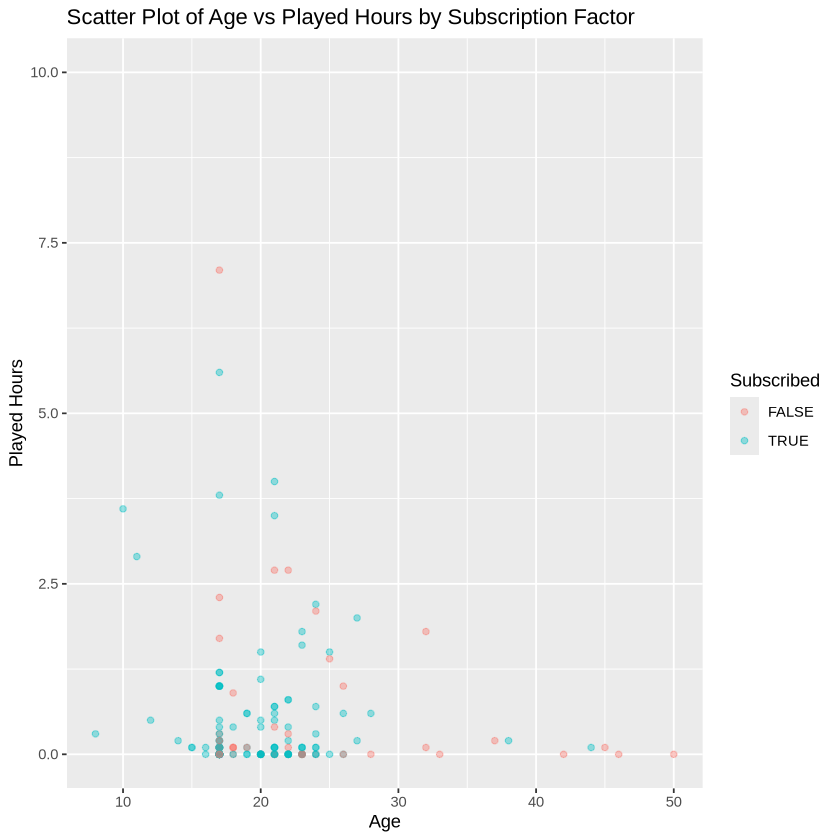

In [9]:
players |> 
ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
geom_point(alpha = 0.4) +
labs(title = "Scatter Plot of Age vs Played Hours by Subscription Factor",
x = "Age",
y = "Played Hours",
color = "Subscribed") +
ylim(0, 10)

**Figure 1**
Scatter plot that shows each observation in the data set and is colored by wheter they player has subscribed or not. Age being in the x-axis and plyed hours in the y-axis.

From this plot I can see that data is quite spread out when we look at age. But we can also see that most of the data lies below the 7.5 hours mark. When plotting I decided to limit the y-axis to 0 to 10 because the data was very concentrated below the vertical line at y=5.

### *Step 1*: Data Splitting
For us to find the best number of K as well as test if our classifier is a good model we will split the data into a training and test subset. I chose to pick a proportion of 70%, because that is the proportion I have seen in most of the tutorials and worksheets.

In [11]:
set.seed(123)
players_split <- initial_split(players, prop = 0.7, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

### *Step 2*: Preprocessing Recipe
I set my recipe and standardized the predictors so they can have the same weight on the classifier. 

In [12]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())


### *Step 3*: Specify KNN Model 

This third step I am setting my model specification, in this part is interesting to highlight that I am setting my neighnors as tune, becaus later on I will find the best k to use on my model. 

In [13]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

### *Step 4*: 5-Fold Cross Validation

I have chosen to perform a 5-fold cross validation, because I want all my data to be at least once in the validation subset and at least one in the training subset. I chose this approach to reduce the chances of getting results that are purely affected my luck/randomness and also avoid overfitting.

In [14]:
set.seed(123)
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

### *Step 5*: Create Grid of K values

In [15]:
k_vals <- tibble(neighbors = seq(1, 15, by = 2))

### *Step 6: Define Workflow and Tune Model*

In [16]:
players_workflow <- workflow() |>
add_recipe(players_recipe) |>
add_model(knn_spec)

In [17]:
set.seed(123)
knn_results <- players_workflow |>
tune_grid(resamples = players_vfold, grid = k_vals) |>
collect_metrics()

knn_results 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5706553,5,0.03669467,Preprocessor1_Model1
1,roc_auc,binary,0.5889662,5,0.02276609,Preprocessor1_Model1
3,accuracy,binary,0.5349817,5,0.03916462,Preprocessor1_Model2
3,roc_auc,binary,0.5997697,5,0.02513029,Preprocessor1_Model2
5,accuracy,binary,0.6752340,5,0.05152877,Preprocessor1_Model3
5,roc_auc,binary,0.5919267,5,0.03077297,Preprocessor1_Model3
7,accuracy,binary,0.7109483,5,0.02744867,Preprocessor1_Model4
7,roc_auc,binary,0.5775564,5,0.03703239,Preprocessor1_Model4
9,accuracy,binary,0.7111925,5,0.03132498,Preprocessor1_Model5


### *Step 7: Select Best K by Accuracy*

In [18]:
accuracies <- knn_results |> filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5706553,5,0.03669467,Preprocessor1_Model1
3,accuracy,binary,0.5349817,5,0.03916462,Preprocessor1_Model2
5,accuracy,binary,0.6752340,5,0.05152877,Preprocessor1_Model3
7,accuracy,binary,0.7109483,5,0.02744867,Preprocessor1_Model4
9,accuracy,binary,0.7111925,5,0.03132498,Preprocessor1_Model5
11,accuracy,binary,0.7191494,5,0.03612040,Preprocessor1_Model6
13,accuracy,binary,0.7485348,5,0.02293407,Preprocessor1_Model7
15,accuracy,binary,0.7334351,5,0.02084155,Preprocessor1_Model8


In [19]:
best_k <- accuracies |> 
  slice_max(mean) |> 
  pull(neighbors)

best_k

[1] 13

In this step I was able to find that the best numbe rof neighbours would be 13.

### *Step 8*: Finalize Model with Best K

In [22]:
final_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

final_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(final_knn_spec)

final_fit <- final_workflow |> fit(data = players_train)

### *Step 9*: Predict on Test Set & Evaluate

In [23]:
test_predictions <- predict(final_fit, players_test) |> 
bind_cols(players_test)

test_metrics <- test_predictions |> 
metrics(truth = subscribe, estimate = .pred_class)

test_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7288136
kap,binary,0.1464738


### *Step 10: Confusion Matrix*

In [30]:
conf_matrix_data <- conf_mat(test_predictions, truth = subscribe, estimate = .pred_class)
conf_matrix_data

          Truth
Prediction FALSE TRUE
     FALSE     3    3
     TRUE     13   40

In [39]:
conf_matrix_data <- data.frame(
Prediction = c("FALSE", "FALSE", "TRUE", "TRUE"),
Truth = c("FALSE", "TRUE", "FALSE", "TRUE"),
Count = c(3, 3, 13, 40))
conf_matrix_data

Prediction,Truth,Count
<chr>,<chr>,<dbl>
FALSE,FALSE,3
FALSE,TRUE,3
TRUE,FALSE,13
TRUE,TRUE,40


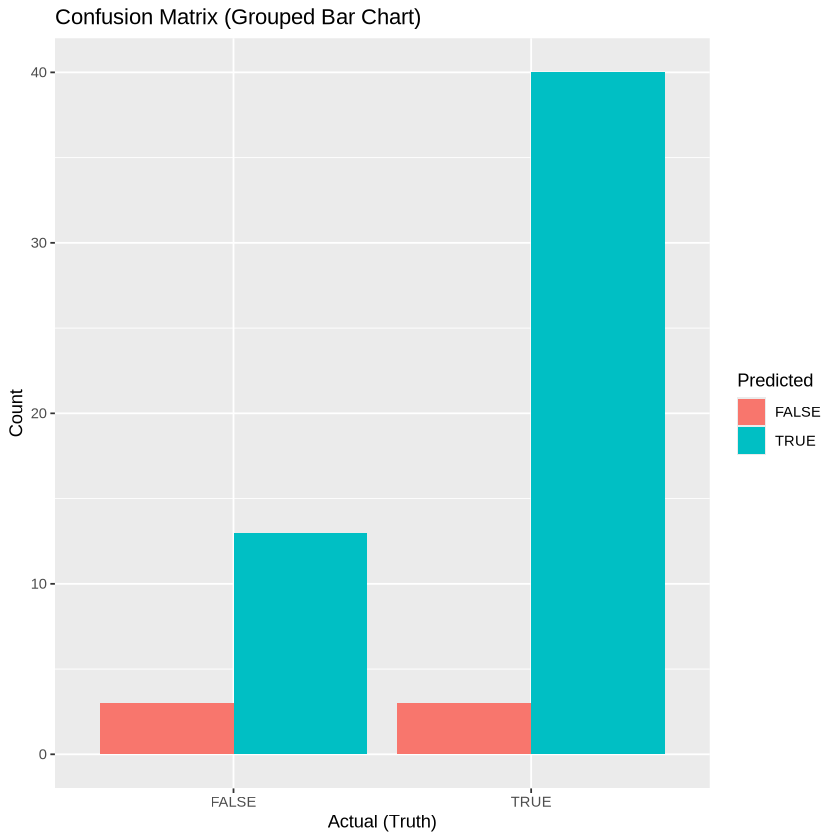

In [40]:
ggplot(conf_matrix_data, aes(x = Truth, y = Count, fill = Prediction)) +
geom_bar(stat = "identity", position = "dodge") +
labs(title = "Confusion Matrix (Grouped Bar Chart)",x = "Actual (Truth)", y = "Count",fill = "Predicted") 

**Figure 2**
Bar Chart of how many correct and wrong predictions the classifier got it. 

### Notes on the Method Chosen to Perform this Data Analysis ###
For this project I used a classification model because the goal is to predict whether a player subscribes based on 2 variables: age and played hours, which are both numerical. This method is appropriate since I am trying to predict a factor/category. I split the data into training and test sets (70/10) and used 5-fold cross-validation on the training set to tune and compare models. 

The main assumption that I have used when implementing the KNN classifier is that similar observations have similar caratheristics. However, one limitation of this model is that it can be affected by noise and randomness (even tough I used cross validation to avoid it). 

## Discussion and Conclusion ##

Through this analysis, we found that the classifier I developed achieves an accuracy of approximately 73%, meaning it correctly predicts the subscription status about three-quarters of the time.

I was somewhat surprised by this level of accuracy, given that the model relies on only two variables — Age and Played Hours. Intuitively, I expected additional factors to play a significant role in predicting subscription behavior. This result suggests that Age and Played Hours alone hold considerable predictive power, though likely not the full story.

However, this finding also indicates that relying solely on these two variables may be insufficient for fully understanding or accurately predicting subscription behavior. Important factors beyond Age and Played Hours may influence subscription decisions, and excluding them could lead to incomplete or misleading conclusions.

A key question arising from this analysis is: To what extent could targeted marketing strategies informed by these predictions improve actual subscription conversion rates? Exploring this could help translate predictive insights into practical actions that enhance user engagement.